# Implementación de la regresión lineal

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


In [68]:
# Generar datos de ejemplo
np.random.seed(0)  # Para reproducibilidad
X = np.random.uniform(1, 10, 5000)  # Generar 50 valores aleatorios para las horas de estudio
error = np.random.normal(0, 5, 5000)  # Generar errores aleatorios
y = 50 + 5 * X + error  # Generar la puntuación del examen

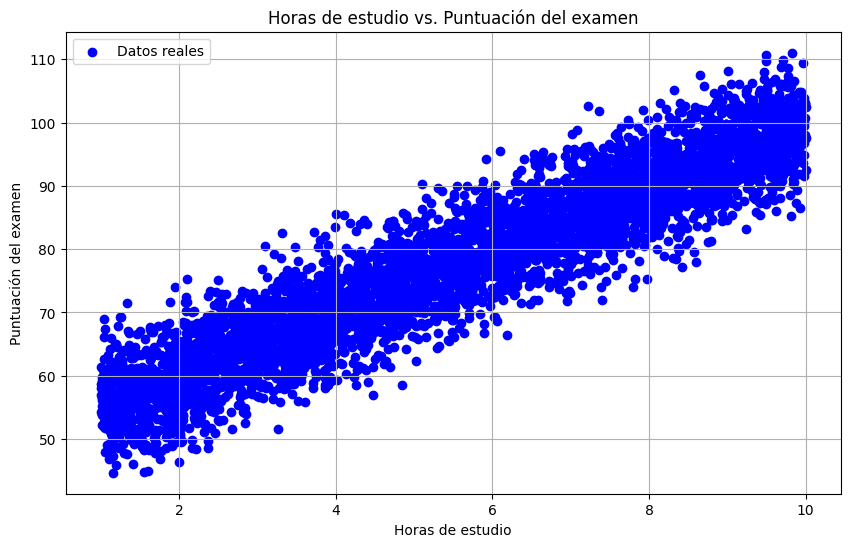

In [69]:
# Visualización de los datos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
# 80 % TRAIN Y VAL 20 % TEST

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

print('Datos de Entrenamiento:', X_train.shape[0])
print('Datos de Validación:', X_val.shape[0])
print('Datos de Test:', X_test.shape[0])


Datos de Entrenamiento: 3000
Datos de Validación: 1000
Datos de Test: 1000


## Implementación manual de la regresión con gradiente descendente

In [71]:
# Función de costo (Mean Squared Error)
def cost_function(y_true, y_pred):
    n = len(y_true)
    cost = sum((y_true - y_pred) ** 2) / n
    return cost

# Gradiente descendente para ajustar los parámetros del modelo
def train_regression(X_train, y_train, X_val, y_val, lr, epochs):
    # 1. Inicializar los coeficientes (pesos) w y b
    w = 50
    b = 50
    train_loss_per_epoch = []
    val_loss_per_epoch = []

    for epoch in range(epochs):
        # 3. Calcular y_pred del conjunto de entrenamiento por epoch
        y_train_pred = X_train * w + b
        
        # 4. Calcular las pérdidas de entrenamiento y almacenarlas en una lista por epoch [train_loss_per_epoch]
        train_loss = cost_function(y_train, y_train_pred)
        train_loss_per_epoch.append(train_loss)
        
        # 5. Calcular los gradientes para los pesos w y b
        grad_w = (-2 / len(X_train)) * sum(X_train * (y_train - y_train_pred))
        grad_b = (-2 / len(X_train)) * sum(y_train - y_train_pred)
        
        # 6. Actualizar los pesos w y b (que será el valor actual del peso menos el learning rate por el gradiente del peso)
        w -= lr * grad_w
        b -= lr * grad_b
        
        # 7. Calcular y_pred del conjunto de validación por epoch
        y_val_pred = X_val * w + b
        
        # 8. Calcular las pérdidas de validación y almacenarlas en una lista por epoch [val_loss_per_epoch]
        val_loss = cost_function(y_val, y_val_pred)
        val_loss_per_epoch.append(val_loss)

    return w, b, train_loss_per_epoch, val_loss_per_epoch

In [72]:
# Hiperparámetros
lr = 0.01  # Tasa de aprendizaje
epochs = 100  # Número de épocas

# Entrenar el modelo
w, b, train_loss_per_epoch, val_loss_per_epoch = train_regression(X_train, y_train, X_val, y_val, lr=lr, epochs=epochs)

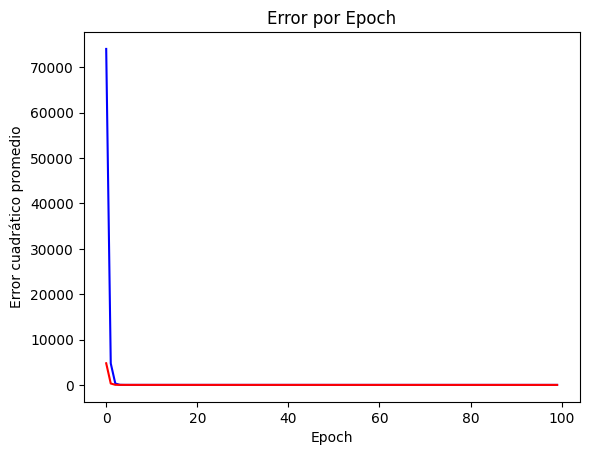

In [73]:
# Visualización del error de entrenamiento por epoch
plt.figure()
plt.plot(range(epochs), train_loss_per_epoch, '-b')
plt.plot(range(epochs), val_loss_per_epoch, '-r')
plt.xlabel('Epoch')
plt.ylabel('Error cuadrático promedio')
plt.title('Error por Epoch')
plt.show()

Costo del modelo: 29.811054688087825


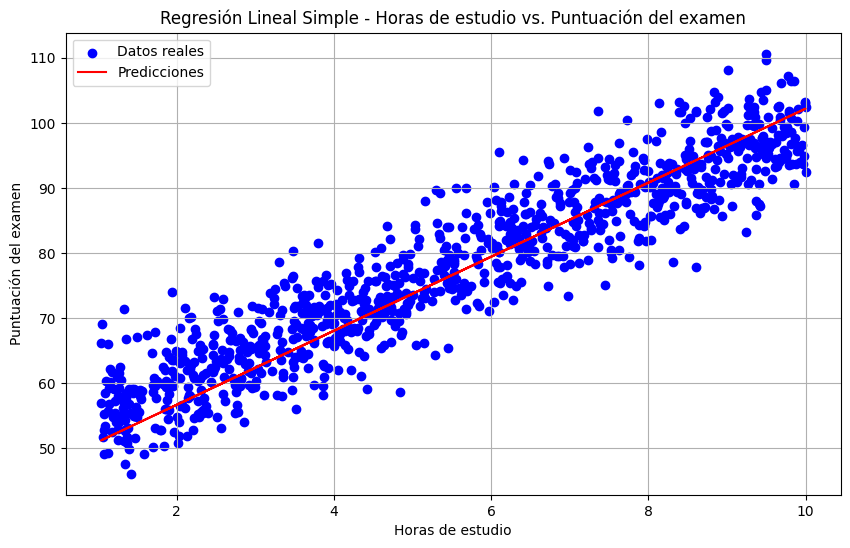

In [74]:
# Realizar predicciones en test
y_pred = X_test * w + b

# Calcular el costo
cost = cost_function(y_test, y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
# Calcular las métricas de evaluación mse, mae, r2 y mape
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mape(y_test, y_pred)

print("MSE en el conjunto de test:", mse)
print("MAE en el conjunto de test:", mae)
print("R^2 en el conjunto de test:", r2)
print("MAPE en el conjunto de test:", mape)

MSE en el conjunto de test: 29.811054688087793
MAE en el conjunto de test: 4.315015975254107
R^2 en el conjunto de test: 0.8504365663964599
MAPE en el conjunto de test: 5.7020359158501615


## Implementación de la regresión lineal usando sklearn

In [76]:
X_train_reshaped = X_train.reshape(-1, 1)
X_test_reshaped = X_test.reshape(-1, 1)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train_reshaped, y_train)

LinearRegression()

Costo del modelo: 25.24963738333083


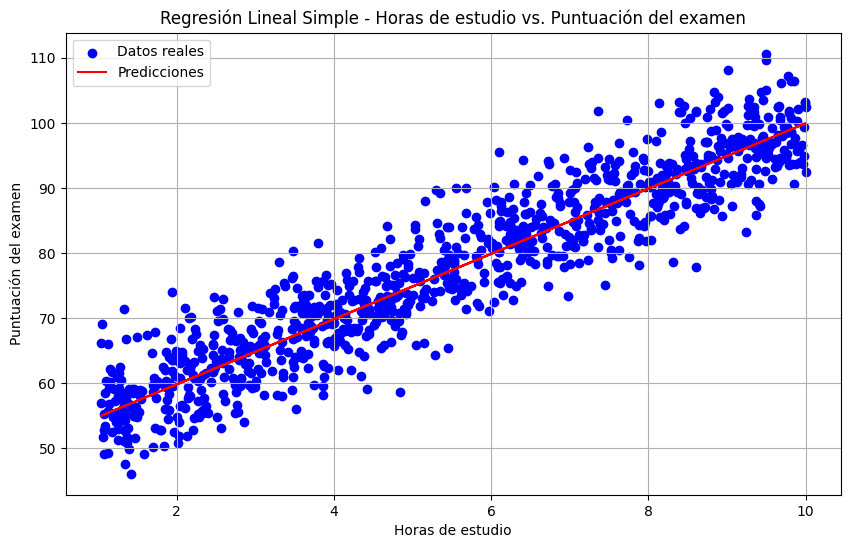

In [77]:
# Realizar predicciones en test
y_pred = model.predict(X_test_reshaped)

# Calcular el costo (Mean Squared Error)
cost = mean_squared_error(y_test, y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_train = model.predict(X_train_reshaped)

mse = mean_squared_error(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_2 = mape(y_train, y_pred_train)

print("MSE en el conjunto de entrenamiento:", mse)
print("MAE en el conjunto de entrenamiento:", mae)
print("R^2 en el conjunto de entrenamiento:", r2)
print("MAPE en el conjunto de entrenamiento:", mape_2)

MSE en el conjunto de entrenamiento: 23.437293509479943
MAE en el conjunto de entrenamiento: 3.829111436954274
R^2 en el conjunto de entrenamiento: 0.8770641646391161
MAPE en el conjunto de entrenamiento: 5.15029592425338


## Comparación de parámetros obtenidos

In [79]:
b_sklearn = model.intercept_
w_sklearn = model.coef_[0]

print("Coeficiente de intercepción (b) - Manual:", b)
print("Coeficiente de pendiente (w) - Manual:", w)
print("Coeficiente de intercepción (b) - Scikit-learn:", b_sklearn)
print("Coeficiente de pendiente (w) - Scikit-learn:", w_sklearn)

Coeficiente de intercepción (b) - Manual: 45.30484001856353
Coeficiente de pendiente (w) - Manual: 5.689116830139421
Coeficiente de intercepción (b) - Scikit-learn: 49.793769346749876
Coeficiente de pendiente (w) - Scikit-learn: 5.014015542462287
